In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

# Import label encoder 
from sklearn import preprocessing 


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

***

In [31]:
#IMPORTING DATASET
df = pd.read_csv('PEP1.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Understanding the Dataset

***

In [3]:
df.shape

(1460, 81)

In [4]:
df.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [5]:
df.isna().sum(axis=0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## EDA of Numerical Variables

***

In [6]:
#UnIQUE
numeric_df = df.select_dtypes(include=[np.number])
numericcol = numeric_df.columns.to_list()

#print("\n Numeric :",numeric_df)
print("\n Numeric :",numericcol)


 Numeric : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [7]:
#Missing values of numerical
numeric_df.isna()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
numeric_df.isna().sum(axis=0)

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
#percentage of missing value
per_missing_value = (numeric_df['LotFrontage'].isna().sum(axis=0)/df.shape[0])*100
per_missing_value

17.73972602739726

In [10]:
numeric_df_r=numeric_df.dropna()
numeric_df_r

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [11]:
numeric_df_rc=numeric_df_r.dropna(axis='columns')
numeric_df_rc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [12]:
numeric_df_rc.isna().sum(axis=0)

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [13]:
#Droping column with Missing value
for i in numeric_df_rc.columns:
    if numeric_df_rc[i].isnull().count()>0:
        df= numeric_df_rc.drop(i,axis=1)
        

In [14]:
df.shape

(1121, 37)

In [15]:
#Removing rows with missing values
numeric_df_rcl=numeric_df_rc.loc[:, ~numeric_df.isnull().any(axis=0)]
numeric_df_rcl

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [16]:
#ChECKING SKEWNESS
numeric_df_rcl.skew(axis=0,skipna=True)

Id                0.018663
MSSubClass        1.412907
LotArea          15.608113
OverallQual       0.287800
OverallCond       0.846451
YearBuilt        -0.618350
YearRemodAdd     -0.565757
BsmtFinSF1        1.934077
BsmtFinSF2        4.399358
BsmtUnfSF         0.875774
TotalBsmtSF       1.754916
1stFlrSF          1.363783
2ndFlrSF          0.807411
LowQualFinSF     10.020823
GrLivArea         1.549961
BsmtFullBath      0.568804
BsmtHalfBath      4.107874
FullBath          0.015822
HalfBath          0.638178
BedroomAbvGr      0.074427
KitchebvGr        4.822542
TotRmsAbvGrd      0.723117
Fireplaces        0.643698
GarageCars        0.206017
GarageArea        0.733894
WoodDeckSF        1.549793
OpenPorchSF       2.403928
EnclosedPorch     3.173250
3SsnPorch        10.854868
ScreenPorch       4.019111
PoolArea         13.783823
MiscVal           9.699989
MoSold            0.173039
YrSold            0.106730
SalePrice         1.933615
dtype: float64

<AxesSubplot:>

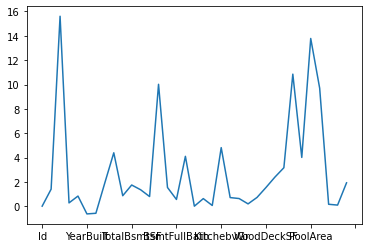

In [17]:
numeric_df_rcl.skew(axis=0,skipna=True).plot()

<AxesSubplot:xlabel='MiscVal'>

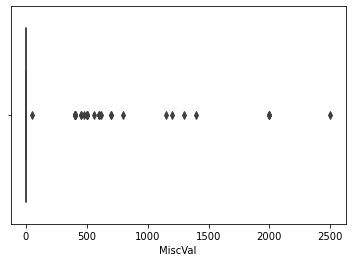

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.boxplot(x=numeric_df_rcl['MiscVal'])

In [19]:
#ChECKING SKEWNESS
# Importing numpy and statsmodels
import numpy as np
from statsmodels.stats.stattools import medcouple
from statsmodels.stats.stattools import robust_skewness

x = np.array(numeric_df_rcl['MiscVal'])
# Using statsmodels.robust_skewness() method
skewness = medcouple(x)

print(skewness)

1.0


In [20]:
#Correleation 

pearsoncorr = numeric_df_rcl.corr(method='pearson')
pearsoncorr

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.021937,-0.040711,-0.058269,0.004387,-0.020862,-0.027664,-0.013751,0.012544,-0.012985,...,-0.025060,-0.001972,0.009935,-0.066833,0.015183,0.048010,0.045799,-0.000570,0.013407,-0.047122
MSSubClass,0.021937,1.000000,-0.198096,0.029522,-0.087859,0.025800,0.006645,-0.070389,-0.075439,-0.145582,...,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotArea,-0.040711,-0.198096,1.000000,0.167525,-0.034348,0.029205,0.026848,0.230441,0.138234,0.011288,...,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,-0.058269,0.029522,0.167525,1.000000,-0.163157,0.589385,0.570757,0.249500,-0.068506,0.322663,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,0.004387,-0.087859,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.054788,0.042314,-0.148630,...,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,-0.020862,0.025800,0.029205,0.589385,-0.426462,1.000000,0.623171,0.236941,-0.054414,0.177545,...,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,-0.027664,0.006645,0.026848,0.570757,0.039402,0.623171,1.000000,0.120774,-0.057024,0.199893,...,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
BsmtFinSF1,-0.013751,-0.070389,0.230441,0.249500,-0.054788,0.236941,0.120774,1.000000,-0.035780,-0.502225,...,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301
BsmtFinSF2,0.012544,-0.075439,0.138234,-0.068506,0.042314,-0.054414,-0.057024,-0.035780,1.000000,-0.220190,...,0.032338,0.010518,0.047221,-0.030848,0.067899,0.061212,0.014290,-0.036101,0.036395,-0.028021
BsmtUnfSF,-0.012985,-0.145582,0.011288,0.322663,-0.148630,0.177545,0.199893,-0.502225,-0.220190,1.000000,...,0.005391,0.151572,-0.035791,0.021502,-0.006398,-0.053894,-0.038915,0.027068,-0.026736,0.213129


<AxesSubplot:>

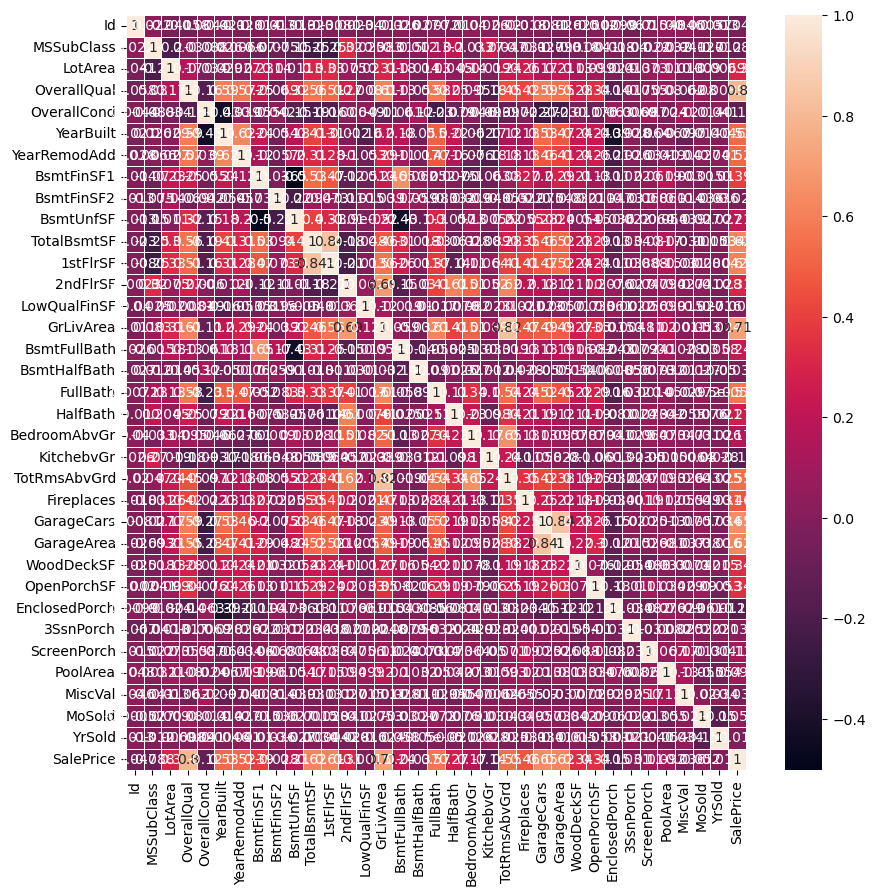

In [21]:
#corrmatrix

plt.figure(figsize=(10,10), dpi=100)
sns.heatmap(pearsoncorr,
xticklabels=pearsoncorr.columns,
yticklabels=pearsoncorr.columns,
annot=True,
linewidths=0.5)

In [22]:
#Correlation with output variables
cor_target = abs(pearsoncorr['SalePrice'])
cor_target

Id               0.047122
MSSubClass       0.088032
LotArea          0.299962
OverallQual      0.797881
OverallCond      0.124391
YearBuilt        0.525394
YearRemodAdd     0.521253
BsmtFinSF1       0.390301
BsmtFinSF2       0.028021
BsmtUnfSF        0.213129
TotalBsmtSF      0.615612
1stFlrSF         0.607969
2ndFlrSF         0.306879
LowQualFinSF     0.001482
GrLivArea        0.705154
BsmtFullBath     0.236737
BsmtHalfBath     0.036513
FullBath         0.566627
HalfBath         0.268560
BedroomAbvGr     0.166814
KitchebvGr       0.140497
TotRmsAbvGrd     0.547067
Fireplaces       0.461873
GarageCars       0.647034
GarageArea       0.619330
WoodDeckSF       0.336855
OpenPorchSF      0.343354
EnclosedPorch    0.154843
3SsnPorch        0.030777
ScreenPorch      0.110427
PoolArea         0.092488
MiscVal          0.036041
MoSold           0.051568
YrSold           0.011869
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [23]:
relevant_feaures = cor_target[cor_target>0.5]
relevant_feaures

OverallQual     0.797881
YearBuilt       0.525394
YearRemodAdd    0.521253
TotalBsmtSF     0.615612
1stFlrSF        0.607969
GrLivArea       0.705154
FullBath        0.566627
TotRmsAbvGrd    0.547067
GarageCars      0.647034
GarageArea      0.619330
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [24]:
relevant_feaures_df = numeric_df_rc[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','SalePrice']]

In [25]:
relevant_feaures_df.shape

(1121, 11)

In [26]:
#RELEVANT FEATURES OF NUMERICAL VARIABLES
relevant_feaures_df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


<AxesSubplot:>

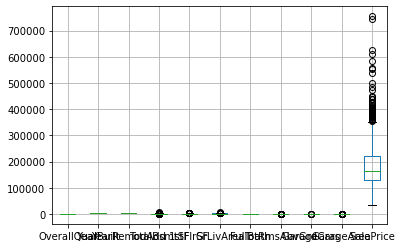

In [27]:
relevant_feaures_df.boxplot()

## EDA of Categorical Variables

***

In [32]:
categoric_df = df.select_dtypes(exclude=[np.number])
categorycol = categoric_df.columns.to_list()

print("Category :",categorycol)

Category : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [33]:
categoric_df_r =categoric_df[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]
categoric_df_r

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [34]:
#TREATING MISSING VALUES OF CATEGOGICAL VARIABLES
categoric_df_r.isna().sum(axis=0)

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [35]:
categoric_df_rc=categoric_df_r.dropna(axis='columns')
categoric_df_rc

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functiol,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


In [36]:
categoric_df_rc.isna().sum(axis=0)

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Functiol         0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
#categoric_df_rc.boxplot()

In [37]:
categoric_df_rcol = categoric_df_rc.columns.to_list()

print("Category :",categoric_df_rcol)

Category : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functiol', 'PavedDrive', 'SaleType', 'SaleCondition']


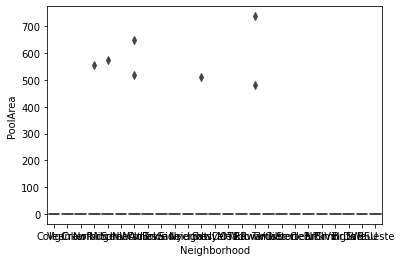

In [38]:
#BOXPLOT AND COUNT PLOT OF CATEGORICALVARIALES
import seaborn as sns
#boxplot of categorical varibales
sns.boxplot(x='Neighborhood',y='PoolArea', data=df )
plt.show()

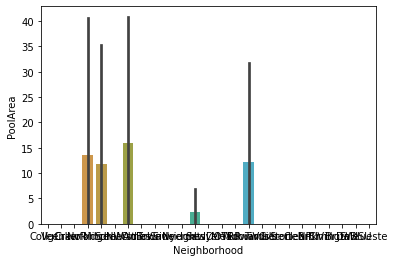

In [39]:
sns.barplot(x='Neighborhood',y='PoolArea', data=df )
plt.show()

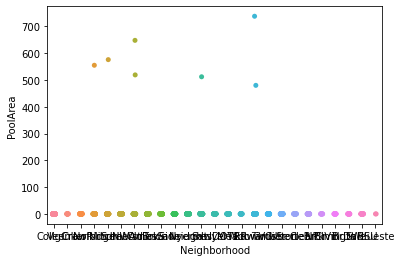

In [40]:
sns.stripplot(x='Neighborhood',y='PoolArea', data=df )
plt.show()

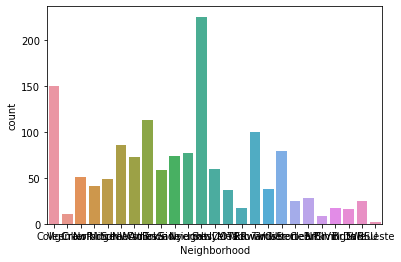

In [41]:
#countPlot
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Neighborhood', data=df)
plt.show()

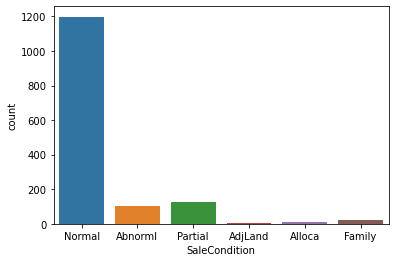

In [42]:
#countPlot
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='SaleCondition', data=df)
plt.show()

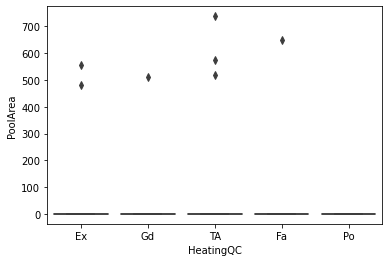

In [43]:
import seaborn as sns
#boxplot of categorical varibales
sns.boxplot(x='HeatingQC',y='PoolArea', data=df )
plt.show()

In [44]:
#chi-square for relevant features of categorical variables

In [45]:
categoric_df_rc

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functiol,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


In [46]:
#fill null values
for col in categoric_df_rc.columns:
    categoric_df_rc[col] =categoric_df_rc[col].fillna(categoric_df_rc[col].mode()[0])
categoric_df_rc.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functiol,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [47]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
for col in categoric_df_rc.columns:
    le = LabelEncoder()
    categoric_df_rc[col] = le.fit_transform(df[col])
categoric_df_rc.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functiol,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,1,0,1,2,6,2,8,4
1,3,1,3,3,0,2,0,23,1,2,...,4,1,1,0,1,3,6,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,1,0,1,2,6,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,0,1,2,1,2,6,2,8,0
4,3,1,0,3,0,2,0,14,2,2,...,4,2,1,0,1,2,6,2,8,4


In [48]:
from sklearn.feature_selection import chi2
X=categoric_df_rc.drop(columns=['SaleCondition'],axis=1)
y=categoric_df_rc['SaleCondition']

In [49]:
#CHI VALUES AND P VALUES
chi_scores = chi2(X,y)
chi_scores

(array([6.97882668e+00, 7.98721543e-02, 6.28159657e+00, 6.37729026e+00,
        1.34554455e+01, 5.44281867e+00, 8.92601177e+00, 2.63508220e+01,
        3.50827574e+00, 1.09291080e-01, 1.56917578e+01, 7.40353700e+00,
        4.52856695e+00, 4.61671727e+00, 2.59343763e+01, 2.86197126e+01,
        4.27335186e+01, 3.11669837e+00, 3.49556249e+01, 2.43599707e-01,
        2.34023196e+02, 1.53397607e+00, 4.74130547e+01, 1.67739753e+00,
        4.28159390e+00, 8.80913653e+01]),
 array([2.22219764e-01, 9.99906790e-01, 2.79774578e-01, 2.71217914e-01,
        1.94647933e-02, 3.64256770e-01, 1.12051941e-01, 7.62871948e-05,
        6.22135775e-01, 9.99797983e-01, 7.78150362e-03, 1.92316466e-01,
        4.76070401e-01, 4.64420534e-01, 9.18893575e-05, 2.75302058e-05,
        4.18430801e-08, 6.81999918e-01, 1.53564549e-06, 9.98571421e-01,
        1.46815269e-48, 9.09115996e-01, 4.67983662e-09, 8.91734892e-01,
        5.09625675e-01, 1.69093266e-17]))

<AxesSubplot:>

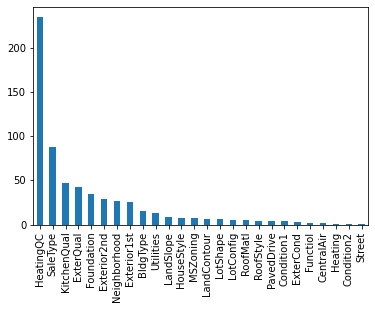

In [50]:
#the higher the chi values the higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<AxesSubplot:>

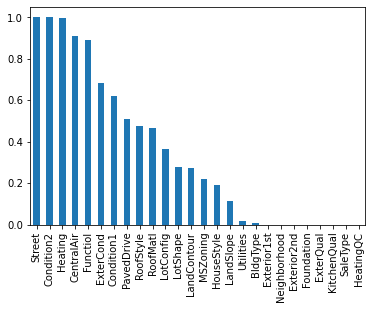

In [51]:
#the higher the p values the lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [52]:
#significant variables p value < 0.05

relevant_cat = categoric_df_rc[['HeatingQC','SaleType','KitchenQual','ExterQual','Foundation','Exterior2nd','Neighborhood','Exterior1st']]

In [53]:
#RELEVANT FEATURES OF CATEGORICAL VARIABLES
relevant_cat.head()

,HeatingQC,SaleType,KitchenQual,ExterQual,Foundation,Exterior2nd,Neighborhood,Exterior1st
0,0,8,2,2,2,13,5,12
1,0,8,3,3,1,8,23,8
2,0,8,2,2,2,13,5,12
3,2,8,2,3,0,15,6,13
4,0,8,2,2,2,13,14,12


In [54]:
relevant_cat.shape

(1460, 8)

In [57]:
#COMBINED RELEVANT NUMERICAL AND CATEGORICAL FEATURES
final_data = pd.concat([relevant_cat, relevant_feaures_df])
final_data

,HeatingQC,SaleType,KitchenQual,ExterQual,Foundation,Exterior2nd,Neighborhood,Exterior1st,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,0.0,8.0,2.0,2.0,2.0,13.0,5.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,8.0,3.0,3.0,1.0,8.0,23.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8.0,2.0,2.0,2.0,13.0,5.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,8.0,2.0,3.0,0.0,15.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,8.0,2.0,2.0,2.0,13.0,14.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1999.0,2000.0,953.0,953.0,1647.0,2.0,7.0,2.0,460.0,175000.0
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1978.0,1988.0,1542.0,2073.0,2073.0,2.0,7.0,2.0,500.0,210000.0
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1941.0,2006.0,1152.0,1188.0,2340.0,2.0,9.0,1.0,252.0,266500.0
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1950.0,1996.0,1078.0,1078.0,1078.0,1.0,5.0,1.0,240.0,142125.0


In [58]:
final_data.shape

(2581, 19)

In [ ]:
#boxplot OF COMBINED DATA

<AxesSubplot:>

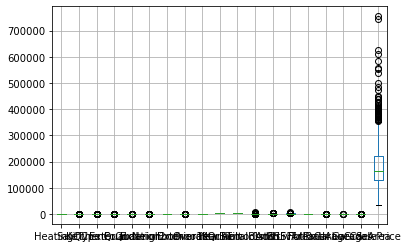

In [59]:
final_data.boxplot()